<a href="https://colab.research.google.com/github/lari-guimaraes/Estudos_machine_learning/blob/main/Redes_Neurais_previs%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv('Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


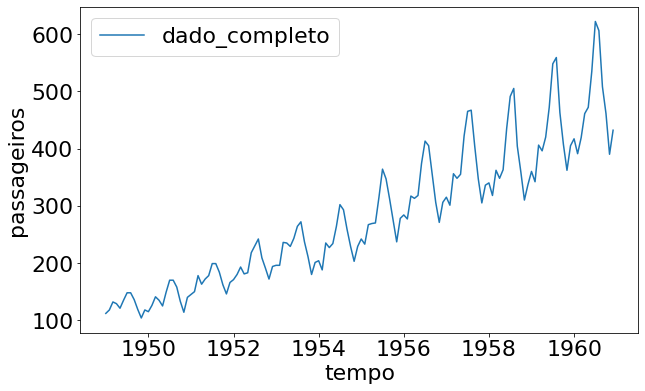

In [3]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [5]:
dado_escalado = sc.transform(passageiros)

In [6]:
x = dado_escalado[:, 0]
y = dado_escalado[:, 1]

In [7]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'Data')

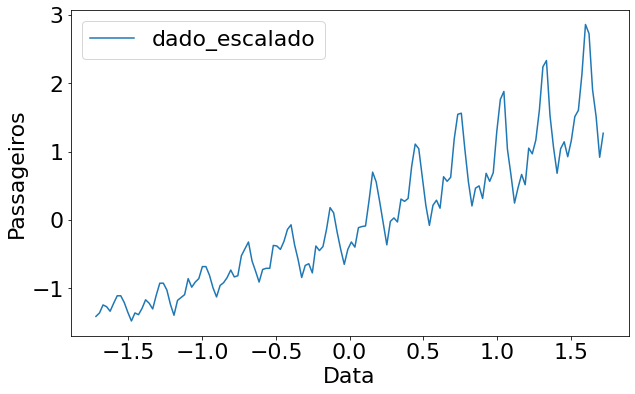

In [8]:
sns.lineplot(x=x, y=y, label = 'dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')


In [9]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [10]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [11]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]


Text(0.5, 0, 'Data')

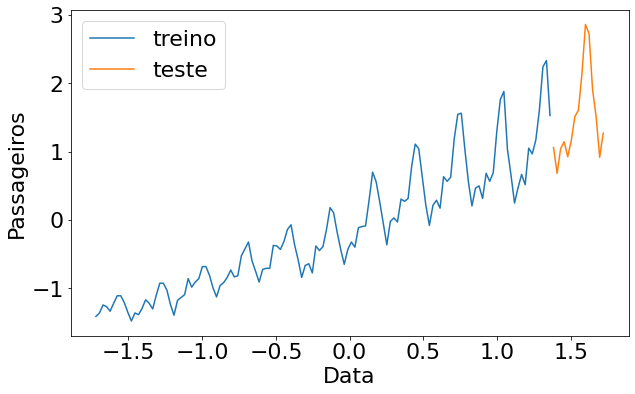

In [12]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
regressor = Sequential()

regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias = False))

regressor.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [16]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 3ms/step - loss: 0.1287


In [17]:
y_predict = regressor.predict(xtreino)

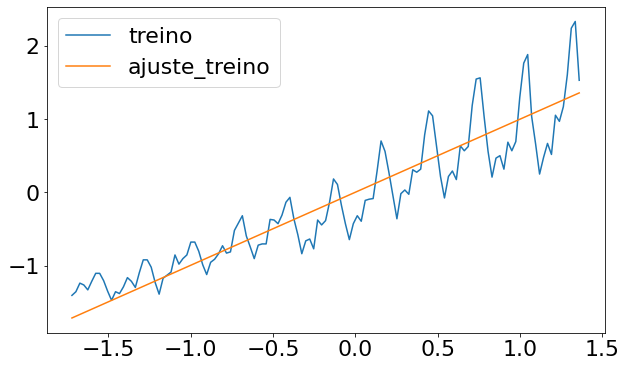

In [18]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [19]:
d = {'tempo': xtreino, 'passageiros':y_predict[:,0]}
resultados = pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.716034
1,-1.696007,-1.692034
2,-1.671950,-1.668033
3,-1.647894,-1.644033
4,-1.623837,-1.620032
...,...,...
124,1.262984,1.260025
125,1.287041,1.284026
126,1.311098,1.308026
127,1.335155,1.332027


In [20]:
resultado_transf = sc.inverse_transform(resultados)

In [21]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']

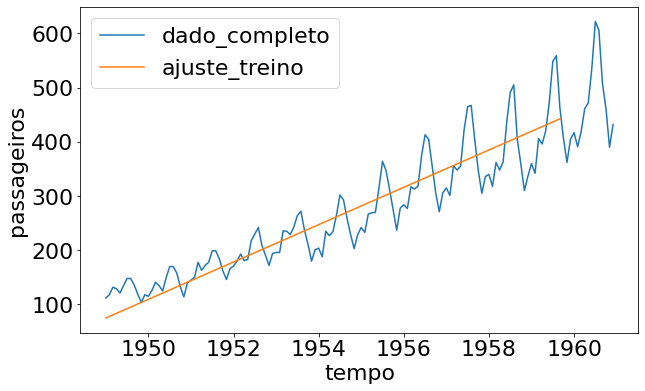

In [22]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')

In [23]:
y_predict_teste = regressor.predict(xteste)

In [24]:
d = {'tempo':xteste, 'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [25]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo', 'passageiros']

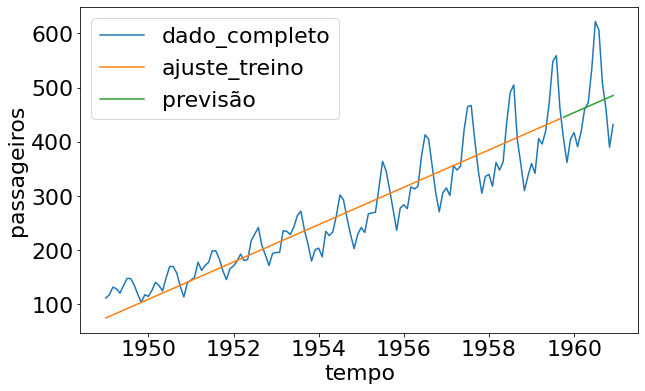

In [26]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

In [27]:
regressor2 = Sequential()

In [28]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [30]:
regressor2.fit(xtreino, ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 4ms/step - loss: 1.2266
Epoch 2/500
5/5 [==============================] - 0s 5ms/step - loss: 1.2199
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2135
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2074
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2021
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 1.1985
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1926
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1882
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1829
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1773
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1711
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [31]:
y_predict = regressor2.predict(xtreino)

In [32]:
y_predict_teste = regressor2.predict(xteste)

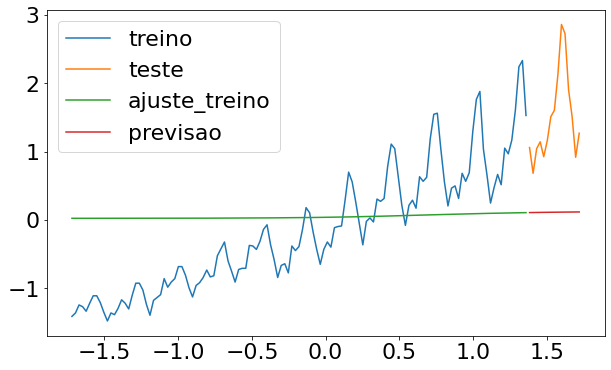

In [33]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsao')

In [34]:
vetor = pd.DataFrame(ytreino)[0]

In [35]:
import numpy as np

In [36]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [37]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [38]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [39]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [40]:
vetor2 = pd.DataFrame(yteste)[0]

In [41]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [42]:
regressor3 = Sequential()

In [43]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [44]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [45]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7750
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7548
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7335
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7126
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6911
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6691
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6480
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6232
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5960
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5671
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5348
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5014
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [46]:
y_predict_novo=regressor3.predict(xtreino_novo)

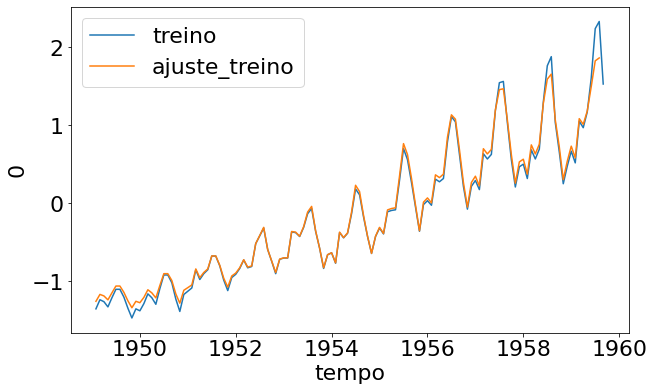

In [47]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [48]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [49]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

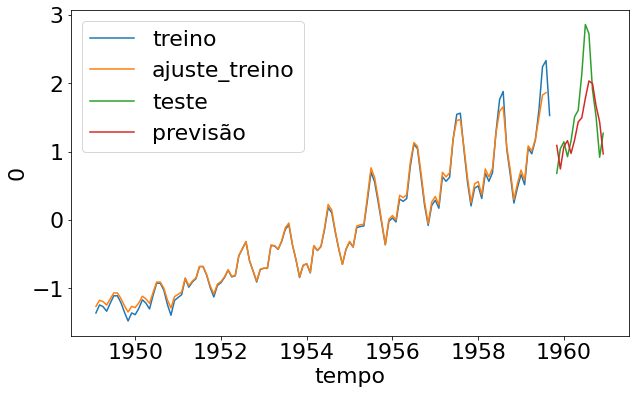

In [50]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')



In [51]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [52]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [53]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [54]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [55]:
regressor4 = Sequential()

In [56]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [57]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [58]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7488
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.6764
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6047
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5406
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4746
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4132
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3579
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3050
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2569
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2207
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1901
Epoch 12/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1692
Epoch 13/300
4/4 [==============================] - 0s 7ms/st

In [59]:
y_predict_novo = regressor4.predict(xtreino_novo)

In [60]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [61]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [62]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

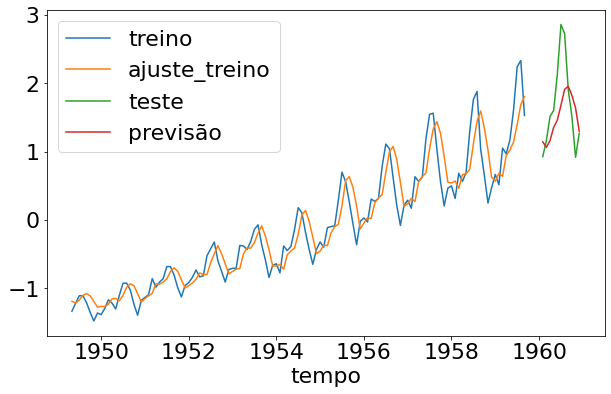

In [63]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão')

In [64]:
bike =  pd.read_csv('bicicletas.csv')

In [65]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [66]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

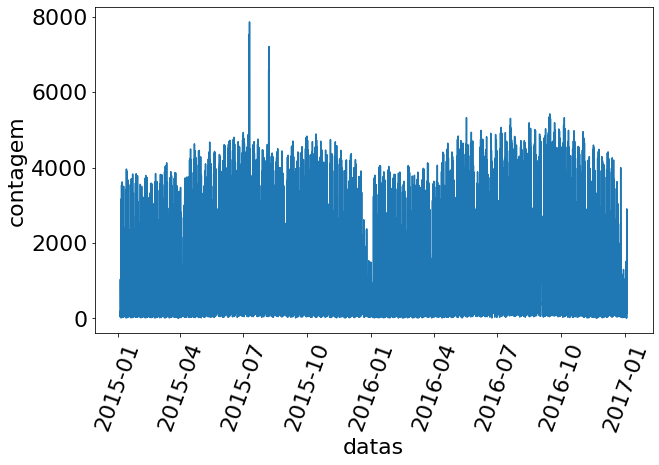

In [67]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [68]:
sc2 = StandardScaler()

In [69]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [70]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [71]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [72]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

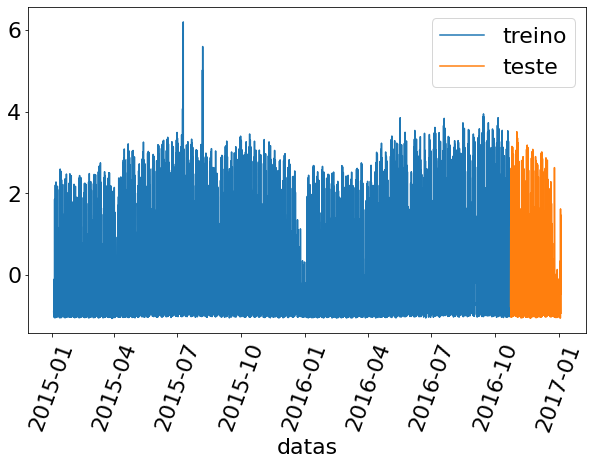

In [73]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [74]:
vetor = pd.DataFrame(ytreino)[0]


In [75]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [76]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [77]:
vetor2 = pd.DataFrame(yteste)[0]

In [78]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

In [79]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1))

In [80]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))

In [81]:
from tensorflow.keras.layers import LSTM

In [82]:
recorrente = Sequential()

In [83]:
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [84]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [85]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [87]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs =100)

Epoch 1/100
490/490 [==============================] - 16s 24ms/step - loss: 0.2647 - val_loss: 0.0853
Epoch 2/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0811 - val_loss: 0.0412
Epoch 3/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0565 - val_loss: 0.0546
Epoch 4/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0473 - val_loss: 0.0281
Epoch 5/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0430 - val_loss: 0.0292
Epoch 6/100
490/490 [==============================] - 12s 25ms/step - loss: 0.0398 - val_loss: 0.0366
Epoch 7/100
490/490 [==============================] - 11s 23ms/step - loss: 0.0380 - val_loss: 0.0343
Epoch 8/100
490/490 [==============================] - 11s 23ms/step - loss: 0.0358 - val_loss: 0.0240
Epoch 9/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0344 - val_loss: 0.0193
Epoch 10/100
490/490 [==============================] - 11s 23ms/step - l

In [89]:
y_ajustado = recorrente.predict(xtreino_novo)


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

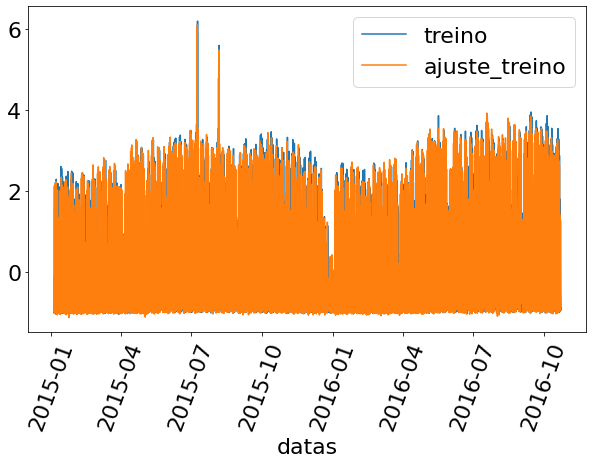

In [90]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino' )
plt.xticks(rotation=70)

In [91]:
y_predito = recorrente.predict(xteste_novo)

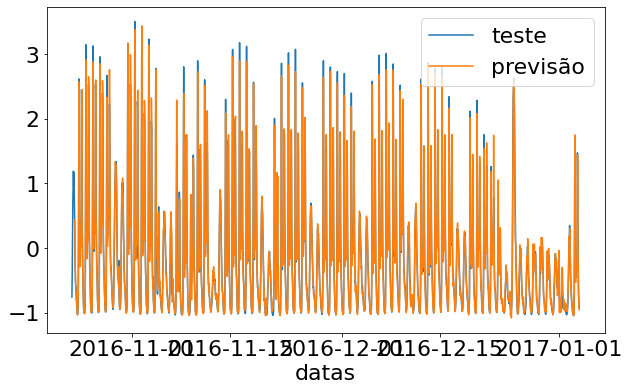

In [92]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label = 'teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsão')

In [88]:
from tensorflow.keras.layers import GRU

In [93]:
recorrente_g = Sequential()

In [94]:

recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [95]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [96]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [97]:

recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [98]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 15s 23ms/step - loss: 0.2109 - val_loss: 0.0602
Epoch 2/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0646 - val_loss: 0.0615
Epoch 3/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0489 - val_loss: 0.0311
Epoch 4/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0415 - val_loss: 0.0240
Epoch 5/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0381 - val_loss: 0.0340
Epoch 6/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0360 - val_loss: 0.0218
Epoch 7/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0338 - val_loss: 0.0232
Epoch 8/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0331 - val_loss: 0.0206
Epoch 9/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0318 - val_loss: 0.0206
Epoch 10/100
490/490 [==============================] - 9s 19ms/step - los

In [99]:
y_predito2 = recorrente_g.predict(xteste_novo)

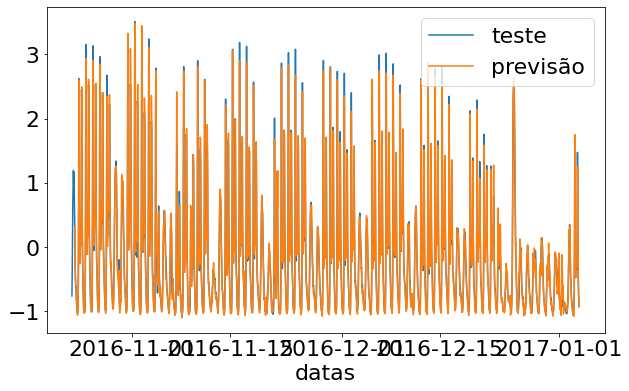

In [100]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsão')

In [101]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


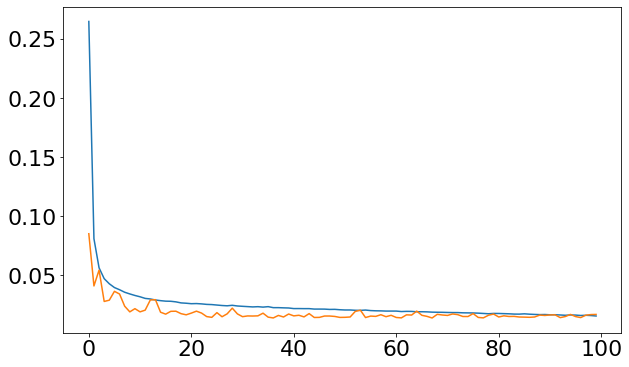

In [102]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

Text(0, 0.5, 'Custo')

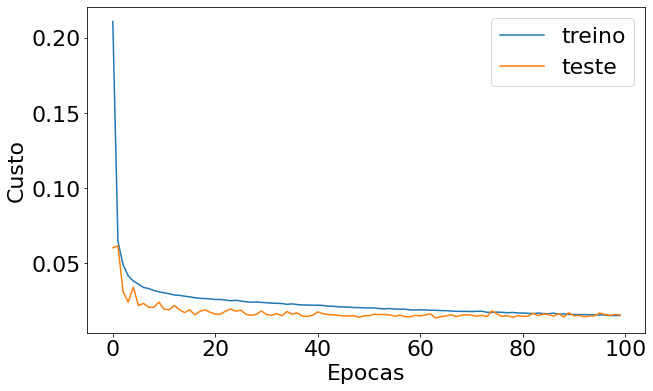

In [103]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Epocas')
plt.ylabel('Custo')